In [1]:
import Bio as Bio

In [2]:
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

In [3]:
s1 = SeqIO.read("sequence1.fasta", "fasta")
s2 = SeqIO.read("sequence2.fasta", "fasta")
s3 = SeqIO.read("sequence3.fasta", "fasta")
s4 = SeqIO.read("sequence4.fasta", "fasta")
s5 = SeqIO.read("sequence5.fasta", "fasta")
s6 = SeqIO.read("sequence6.fasta", "fasta")

In [4]:
print(s6.description)
s1.id = 'Angel_Shark'
s2.id = 'Gray_Reef_Shark'
s3.id = 'Mako_Shark'
s4.id = 'Tiger_Shark'
s5.id = 'Great_White_Shark'
s6.id = 'Hammerhead_Shark'


NC_035491.1 Sphyrna mokarran voucher OC-226 mitochondrion, complete genome


In [5]:
sharks = SeqIO.write([s1,s2,s3,s4,s5,s6], "sharks.fasta", "fasta")

In [6]:
with open("sharks.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [7]:
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')


In [8]:
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

Angel_Shark 0.000000
Tiger_Shark 0.211849    0.000000
Gray_Reef_Shark 0.207828    0.115000    0.000000
Hammerhead_Shark    0.215988    0.136581    0.120144    0.000000
Mako_Shark  0.227340    0.204458    0.198250    0.206291    0.000000
Great_White_Shark   0.223201    0.201147    0.195294    0.201029    0.125229    0.000000
    Angel_Shark Tiger_Shark Gray_Reef_Shark Hammerhead_Shark    Mako_Shark  Great_White_Shark


In [9]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

In [10]:
shark_tree = constructor.build_tree(alignment)
shark_tree.rooted = True
print(shark_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner4')
        Clade(branch_length=0.030501685094306126, name='Inner2')
            Clade(branch_length=0.04461558170243804, name='Inner1')
                Clade(branch_length=0.06065600425708033, name='Great_White_Shark')
                Clade(branch_length=0.06457310944244073, name='Mako_Shark')
            Clade(branch_length=0.11804036342852633, name='Angel_Shark')
        Clade(branch_length=0.004175781942884184, name='Inner3')
            Clade(branch_length=0.052134452787796354, name='Gray_Reef_Shark')
            Clade(branch_length=0.06286584284278365, name='Tiger_Shark')
        Clade(branch_length=0.0666868680896352, name='Hammerhead_Shark')


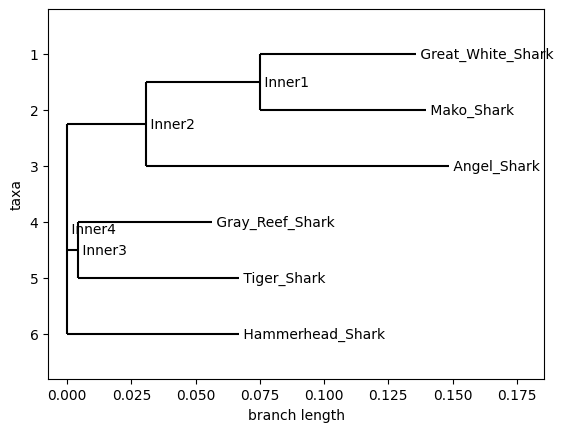

In [14]:
Phylo.draw(shark_tree)

In [32]:
Phylo.write(shark_tree, "shark_tree.xml", "phyloxml")

1

In [33]:
import matplotlib
import matplotlib.pyplot as plt

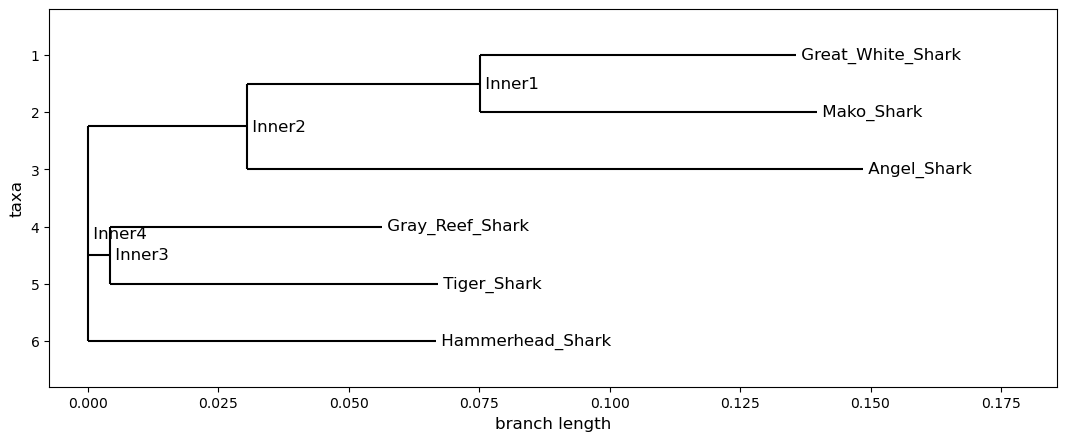

In [34]:
fig = plt.figure(figsize=(13, 5), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
#turtle_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(shark_tree, axes=axes)
#plt.savefig(output_file)

In [1]:
fig.savefig("shark_cladogram")

NameError: name 'fig' is not defined

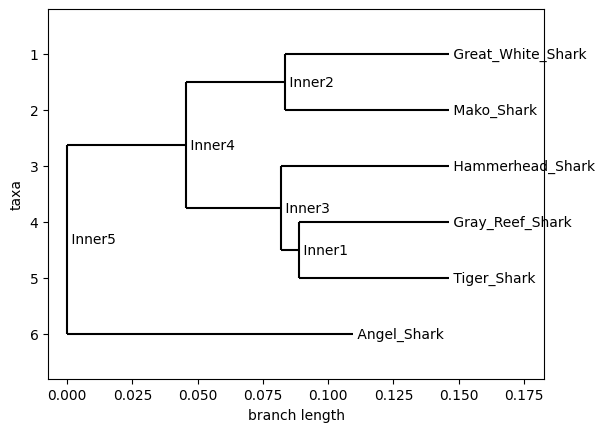

In [15]:
upgmatree = constructor.upgma(distance_matrix)
Phylo.draw(upgmatree)

In [16]:
print(upgmatree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner5')
        Clade(branch_length=0.04536451250517351, name='Inner4')
            Clade(branch_length=0.03824720629101874, name='Inner2')
                Clade(branch_length=0.06261455684976053, name='Great_White_Shark')
                Clade(branch_length=0.06261455684976053, name='Mako_Shark')
            Clade(branch_length=0.03668036421687457, name='Inner3')
                Clade(branch_length=0.0641813989239047, name='Hammerhead_Shark')
                Clade(branch_length=0.0066812511086147, name='Inner1')
                    Clade(branch_length=0.057500147815290004, name='Gray_Reef_Shark')
                    Clade(branch_length=0.057500147815290004, name='Tiger_Shark')
        Clade(branch_length=0.10954591142907821, name='Angel_Shark')
